In [23]:
import pandas as pd
import numpy as np

In [24]:
pip install seaborn

     |████████████████████████████████| 292 kB 4.9 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [25]:
import seaborn as sns

In [26]:
pip install statsmodels

     |████████████████████████████████| 9.8 MB 4.8 MB/s            
     |████████████████████████████████| 233 kB 50.9 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [27]:
import statsmodels.api as sm

In [29]:
pip install sklearn

  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 24.8 MB 4.9 MB/s            
     |████████████████████████████████| 306 kB 41.9 MB/s            
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=06f6fcce65ca206f50c5ad43109951b4f5a94c954215eb65a6030c178b3a7908
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [30]:
from sklearn import linear_model

In [31]:
df = pd.read_csv('reg_data.csv')
df

,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500,33,Chicago,80.0,BMW,Bachelor
1,Female,1200,33,Chicago,82.5,Ford,No
2,Male,2200,34,New York,100.8,BMW,Bachelor
3,Male,2100,42,New York,90.0,BMW,Master
4,Female,1500,29,Chicago,67.0,Ford,Master
5,Female,1700,42,Washington,60.0,Ford,Master
6,Male,3000,50,Washington,77.0,Ford,No
7,Male,3000,55,Washington,77.0,Ford,Bachelor
8,Female,2800,31,New York,87.0,Ford,Bachelor
9,Male,2900,46,New York,70.0,GM,Master


In [32]:
df.corr()

,Salary,Age,Weight
Salary,1.000000,0.616834,-0.080883
Age,0.616834,1.000000,-0.212340
Weight,-0.080883,-0.212340,1.000000


In [33]:
df.columns

Index(['Gender', 'Salary', 'Age', 'Place', 'Weight', 'Company',
       'Academic_degree'],
      dtype='object')

In [34]:
df.dropna(inplace=True)
df

,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500,33,Chicago,80.0,BMW,Bachelor
1,Female,1200,33,Chicago,82.5,Ford,No
2,Male,2200,34,New York,100.8,BMW,Bachelor
3,Male,2100,42,New York,90.0,BMW,Master
4,Female,1500,29,Chicago,67.0,Ford,Master
5,Female,1700,42,Washington,60.0,Ford,Master
6,Male,3000,50,Washington,77.0,Ford,No
7,Male,3000,55,Washington,77.0,Ford,Bachelor
8,Female,2800,31,New York,87.0,Ford,Bachelor
9,Male,2900,46,New York,70.0,GM,Master


In [20]:
#df.drop(inplace = True)
#df

In [35]:
df.corr()

,Salary,Age,Weight
Salary,1.000000,0.616834,-0.080883
Age,0.616834,1.000000,-0.212340
Weight,-0.080883,-0.212340,1.000000


# 1. Is there any relationship between age and salary? (salary depends on age?)

salary = b0 + b1*Age
y = c + mx
b0 -> y intercept
b1 -> pendiente/slope/ increment

In [36]:
y = pd.DataFrame(df['Salary'])
x = pd.DataFrame(df['Age'])

lm=linear_model.LinearRegression()
model_lm = lm.fit(x,y)
model_lm

LinearRegression()

In [37]:
print('The y intercept, b0 = ', model_lm.intercept_)
print('The coeff. of Age, b1 = ', model_lm.coef_)
print('The R^2 values is = ', model_lm.score(x,y))

The y intercept, b0 =  [349.44580104]
The coeff. of Age, b1 =  [[48.09321584]]
The R^2 values is =  0.380484541757693


In [46]:
modelA = sm.OLS.from_formula('Salary~Age', data =df)
resultA = modelA.fit()
resultA.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     6.142
Date:                Fri, 11 Mar 2022   Prob (F-statistic):             0.0326
Time:                        14:16:21   Log-Likelihood:                -91.514
No. Observations:                  12   AIC:                             187.0
Df Residuals:                      10   BIC:                             188.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    349.4458    790.373      0.442      0.668   -1411.614    2110.506
Age           48.0932     19.406      2.478      0.033       4.853      91.333
==============================================================================
Omnibus:                        0.406   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.816   Jarque-Bera (JB):                0.479
Skew:                           0.321   Prob(JB):                        0.787
Kurtosis:                       2.261   Cond. No.                         205.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# salary = b0+b1*age
# salary of a person age =33
# salary = 349.4458 + 48.9032 * 33

salary = 349.4458 + 48.0932 * 33
print('Predicted salary of a person with age 33', salary)

Predicted salary of a person with age 33 1936.5214


In [48]:
res0 = 1500.0 - 1936.5214
res1 = 1200.0 - 1936.5214
print('residual values of first two data are: ', res0, '\t',res1)

residual values of first two data are:  -436.5214000000001 	 -736.5214000000001


In [49]:
RESI_A = resultA.resid
RESI_A

0    -436.521924
1    -736.521924
2     215.384860
3    -269.360866
4    -244.149060
5    -669.360866
6     245.893407
7       5.427328
8     959.664508
9     338.266270
10    699.198429
11   -107.920161
dtype: float64

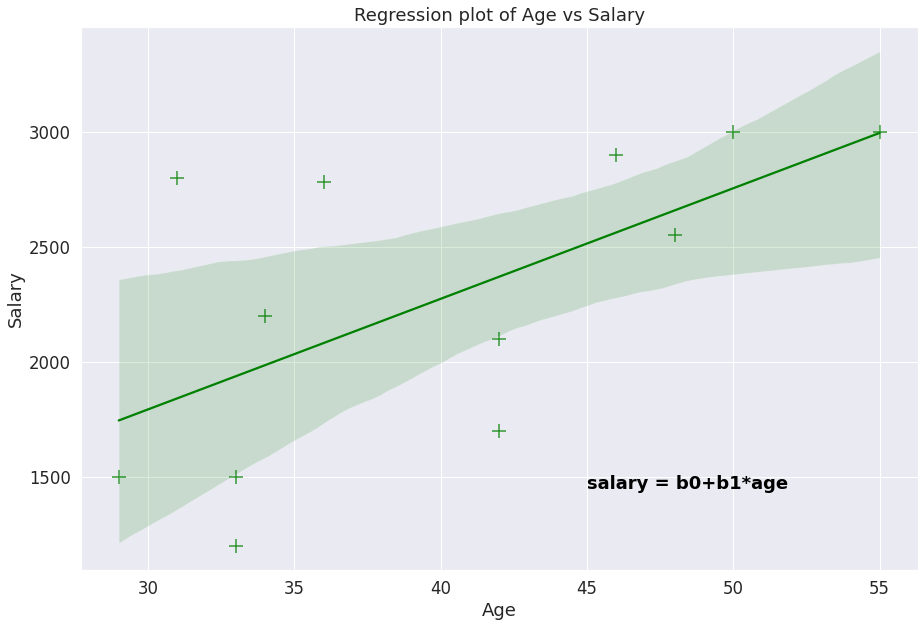

In [56]:
plt.figure(figsize = (15,10))
sns.set(font_scale = 1.5)
ax = sns.regplot(x = 'Age',
                 y = 'Salary',
                 data = df,
                 color = 'green',
                 marker = '+',
                 scatter_kws = {'s':200}
                )
ax.set(xlabel = 'Age',
       ylabel = 'Salary')

ax.text(45, 1450,'salary = b0+b1*age',
       horizontalalignment = 'left', size = 'medium', color = 'black', weight = 'semibold')

ax.set_title('Regression plot of Age vs Salary')
plt.show()

In [57]:
predicted_values = resultA.fittedvalues.to_frame()
predicted_values

,0
0,1936.521924
1,1936.521924
2,1984.615140
3,2369.360866
4,1744.149060
5,2369.360866
6,2754.106593
7,2994.572672
8,1840.335492
9,2561.733730


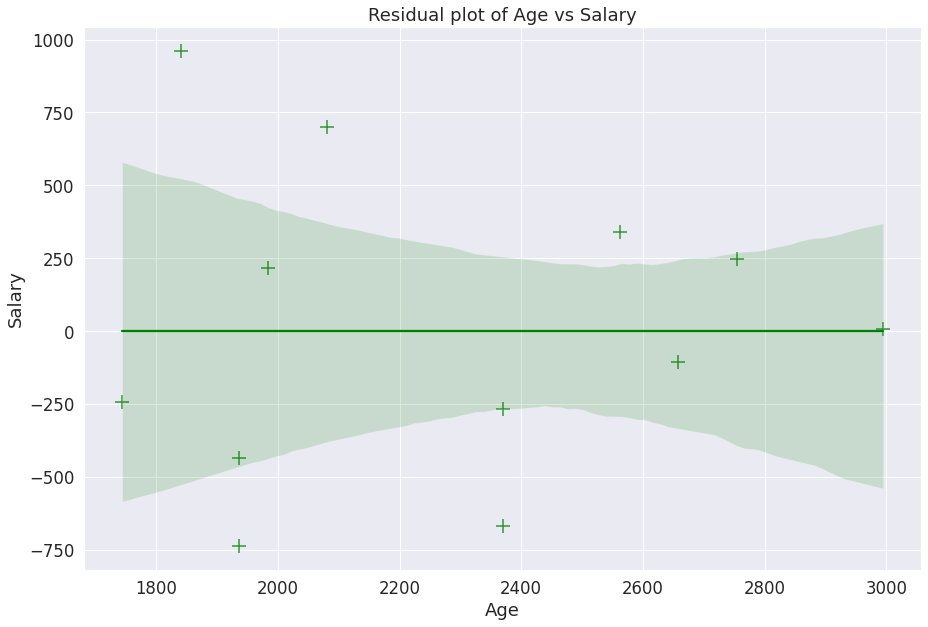

In [58]:
plt.figure(figsize = (15,10))
sns.set(font_scale = 1.5)
ax = sns.regplot(x = predicted_values,
                 y = RESI_A,
                 data = df,
                 color = 'green',
                 marker = '+',
                 scatter_kws = {'s':200}
                )
ax.set(xlabel = 'Age',
       ylabel = 'Salary')

ax.set_title('Residual plot of Age vs Salary')
plt.show()

In [60]:
modelA = sm.OLS.from_formula('Salary~Age+Gender', data =df)
resultA = modelA.fit()
resultA.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     3.101
Date:                Fri, 11 Mar 2022   Prob (F-statistic):             0.0945
Time:                        14:37:51   Log-Likelihood:                -91.242
No. Observations:                  12   AIC:                             188.5
Df Residuals:                       9   BIC:                             189.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        749.8157   1023.148      0.733      0.482   -1564.706    3064.337
Gender[T.Male]   306.7169    474.438      0.646      0.534    -766.535    1379.969
Age               34.2211     29.331      1.167      0.273     -32.130     100.573
==============================================================================
Omnibus:                        1.671   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                1.061
Skew:                           0.691   Prob(JB):                        0.588
Kurtosis:                       2.541   Cond. No.                         269.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

salary = b0+b1*Age + b2*Gender
salary = b0+b1*Age + b2*(G_male + G_female)


salary = 749.8157 + 34.2211 X Age + 306.7169 X Gender[T.Male]

# What is the salary of a male with age 42?

In [63]:
print('The salary of a male with age 42 = ', 749.8157 + 34.2211 * 42 + 306.7169 * 1)
print('The salary of a female with age 42 = ', 749.8157 + 34.2211 * 42 + 306.7169 * 0)

The salary of a male with age 42 =  2493.8188
The salary of a female with age 42 =  2187.1019
